In [41]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
customers = pd.read_csv(r"C:\Users\henis\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\henis\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\henis\Downloads\Transactions.csv")

In [42]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [43]:
transactions['MonthYear'] = transactions['TransactionDate'].dt.to_period('M')

In [44]:
#Statistics
transactions_summary = transactions.describe()
products_summary = products.describe()
customers_summary = customers.describe()

In [45]:
#Transactions per month
transactions_by_month = transactions.groupby('MonthYear').size()

In [46]:
#Revenue per region
transactions_customers = pd.merge(transactions, customers, on="CustomerID")
revenue_by_region = transactions_customers.groupby('Region')['TotalValue'].sum()

In [47]:
#Popular products 
transactions_products = pd.merge(transactions, products, on="ProductID")
popular_products = transactions_products.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)

In [48]:
#Signup by region
signups_by_region = customers.groupby('Region').size()

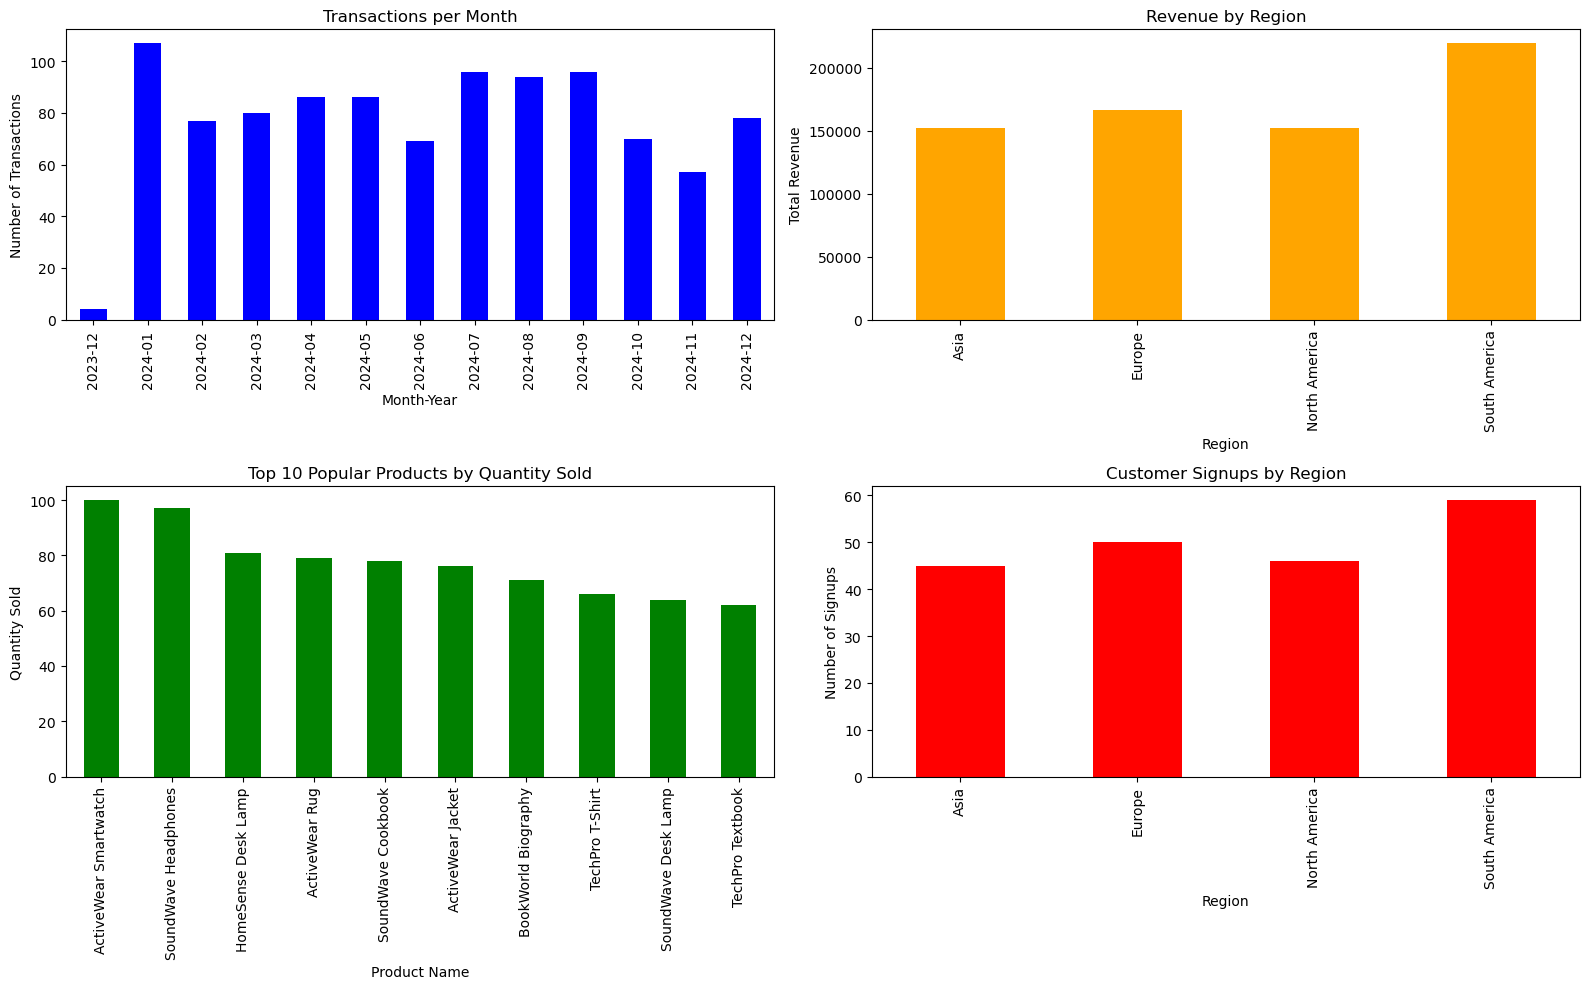

In [57]:
#Visualizations (bar graphs)
plt.figure(figsize=(16, 10))

# Transactions per Month
plt.subplot(2, 2, 1)
transactions_by_month.plot(kind='bar', color='blue')
plt.title('Transactions per Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')

# Revenue by Region
plt.subplot(2, 2, 2)
revenue_by_region.plot(kind='bar', color='orange')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')

# Popular Products
plt.subplot(2, 2, 3)
popular_products.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Popular Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')

# Signups by Region
plt.subplot(2, 2, 4)
signups_by_region.plot(kind='bar', color='red')
plt.title('Customer Signups by Region')
plt.xlabel('Region')
plt.ylabel('Number of Signups')

plt.tight_layout()
plt.show()